# CS365: Graphs and networks
### Author: Prof. Tsourakakis (ctsourak@bu.edu)

This notebook illustrates material we discussed in class, and does not substitute for the actual lecture. Please go through the notebook carefully, and make sure you understand it in depth.

In [1]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt
%matplotlib inline 

### Adjacency matrix representation 

Any graph $G$ can be represented as an *adjacency matrix*. Let's create a simple undirected, unweighted graph, visualize it and see its adjacency matrix.  

[[0 1 1 1]
 [1 0 1 0]
 [1 1 0 0]
 [1 0 0 0]]


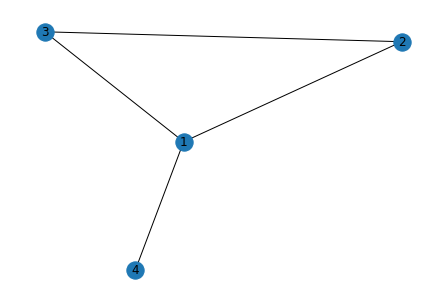

In [2]:
toy_graph = nx.empty_graph()
toy_graph.add_edge(1,2)
toy_graph.add_edge(1,3)
toy_graph.add_edge(2,3)
toy_graph.add_edge(4,1)
nx.draw(toy_graph,with_labels = True)

print(nx.adjacency_matrix(toy_graph).todense())

Another important matrix representation is the Laplacian of a graph. $L(G)=D-A$ where $D=diag(deg(1),\ldots,deg(n))$

In [3]:
L = nx.laplacian_matrix(toy_graph)
print(L.todense())

[[ 3 -1 -1 -1]
 [-1  2 -1  0]
 [-1 -1  2  0]
 [-1  0  0  1]]


*Exercise*: The number of zero eigenvalues of the Laplacian $L_G$ (i.e. the multiplicity of the 0 eigenvalue) equals the number of connected components of the graph $G$. 

In [4]:
ell, u = np.linalg.eig(L.todense())
print(sorted(ell))

[1.1102230246251565e-16, 1.0, 3.0, 4.0]


# Random graphs

1. How many labeled graphs on $n$ nodes exist? How can we sample one uniformly at random? 


The Erdős–Rényi model $G(n,p)$ tosses a coin for each possible edge $(u,v)$, and with probability $p$ it adds the edge. The ${n \choose 2}$ coin tosses are independent. 

2. How many nodes of degree k, do we expect to see in $G(n,p)$ for $k=0,\ldots,n-1$? How many edges do we expect to see in total? How many triangles? 


(array([   7.,   56.,  442., 1426., 2638., 2990., 1707.,  623.,   96.,
          15.]),
 array([ 881. ,  904.4,  927.8,  951.2,  974.6,  998. , 1021.4, 1044.8,
        1068.2, 1091.6, 1115. ]),
 <BarContainer object of 10 artists>)

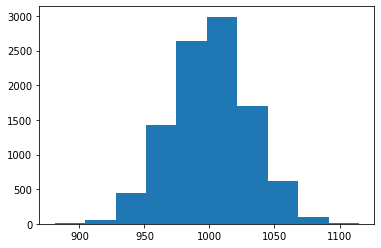

In [5]:
ER = nx.erdos_renyi_graph(10000,0.1)
degree_sequence = [d for _, d in ER.degree()]  # degree sequence
plt.hist(degree_sequence)

3. How many connected components does $G$ have? What if we decrease $p$?

In [6]:
nx.number_connected_components(ER)

1

In [7]:
sparseER = nx.erdos_renyi_graph(10000,0.0001)
nx.number_connected_components(sparseER)

4864

In [8]:
import itertools


def k4s(n=100,p=0.1):
    g = nx.erdos_renyi_graph(n,p)
    count = 0 
    for four_subset in itertools.combinations(g.nodes(), 4):
        subgraph = g.subgraph(four_subset)
        if( subgraph.number_of_edges() ==6 ):
            if(n<=20):
                print(sorted(subgraph.edges()))
            count +=1
    print('Total number of K4s in G(',n,repr(p),')', count)
    return count

k4s(20,0.001)
k4s(20,0.5)


Total number of K4s in G( 20 0.001 ) 0
[(0, 6), (0, 10), (0, 13), (10, 6), (10, 13), (13, 6)]
[(0, 6), (0, 10), (0, 19), (10, 6), (10, 19), (19, 6)]
[(0, 10), (0, 13), (0, 14), (10, 13), (10, 14), (13, 14)]
[(0, 10), (0, 14), (0, 19), (10, 14), (10, 19), (19, 14)]
[(1, 6), (1, 18), (8, 1), (8, 6), (8, 18), (18, 6)]
[(2, 3), (2, 13), (3, 13), (11, 2), (11, 3), (11, 13)]
[(2, 3), (2, 15), (3, 15), (17, 2), (17, 3), (17, 15)]
[(2, 6), (2, 13), (2, 18), (13, 6), (18, 6), (18, 13)]
[(3, 4), (3, 15), (4, 15), (17, 3), (17, 4), (17, 15)]
[(3, 5), (11, 3), (11, 5), (11, 13), (13, 3), (13, 5)]
[(3, 13), (11, 3), (11, 13), (11, 16), (16, 3), (16, 13)]
[(8, 4), (8, 9), (8, 19), (9, 4), (9, 19), (19, 4)]
[(8, 4), (8, 18), (8, 19), (18, 4), (18, 19), (19, 4)]
[(5, 6), (13, 5), (13, 6), (13, 18), (18, 5), (18, 6)]
[(5, 6), (18, 5), (18, 6), (18, 19), (19, 5), (19, 6)]
[(9, 5), (9, 12), (9, 19), (12, 5), (19, 5), (19, 12)]
[(5, 14), (12, 5), (12, 14), (19, 5), (19, 12), (19, 14)]
[(12, 5), (18, 5), (

28

It is a fact that there exists a value $p^\star$ such that if $p\ll p^\star$ there exist no $K_4$s almost surely, while if $p\gg p^\star$ there exist $K_4$s. 

4. What is the threshold value $p^\star$?

For the answer see the lecture notes on the web page.

# Community detection

In [9]:
def generate_graph(n1=50,n2=50,p=.5,q=.1):
    sizes = [n1, n2]
    probs = [[p,q],[q,p]]
    g = nx.stochastic_block_model(sizes, probs, seed=0)
    return g 

g = generate_graph()

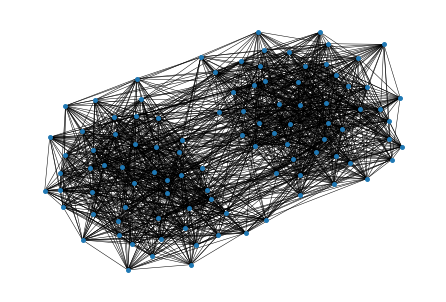

In [10]:
nx.draw(g, node_size=15, width=0.5)

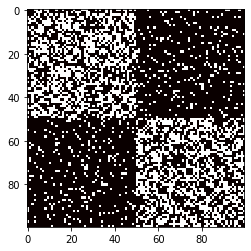

In [11]:
a = nx.to_numpy_matrix(g)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [12]:
lmbd,v = np.linalg.eig(a)

(array([17., 30., 28., 21.,  2.,  0.,  0.,  1.,  0.,  1.]),
 array([-8.74486825, -4.87949378, -1.0141193 ,  2.85125517,  6.71662964,
        10.58200412, 14.44737859, 18.31275307, 22.17812754, 26.04350202,
        29.90887649]),
 <BarContainer object of 10 artists>)

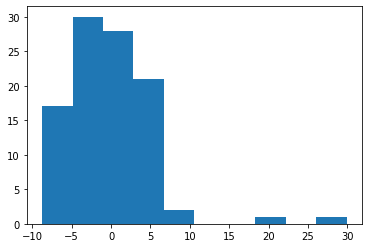

In [13]:
plt.hist(lmbd)

Let's generate a bigger graph to see again the spectrum. Again two eigenvalues are well separated from the bulk.

In [14]:
g2 = generate_graph(1000,1000)
a2 = nx.to_numpy_matrix(g2)
lmbd2, v2 = np.linalg.eig(a2)

(array([1.842e+03, 1.560e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-37.19176869,  26.64644287,  90.48465444, 154.322866  ,
        218.16107756, 281.99928913, 345.83750069, 409.67571225,
        473.51392382, 537.35213538, 601.19034695]),
 <BarContainer object of 10 artists>)

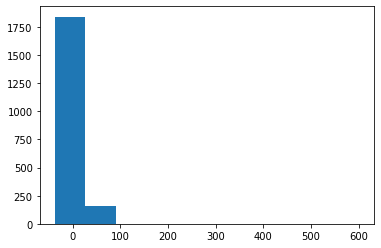

In [15]:
plt.hist(lmbd2)

Since the top two eigenvalues are not visible let's see them.

601.1903469457733   400.54884164297863


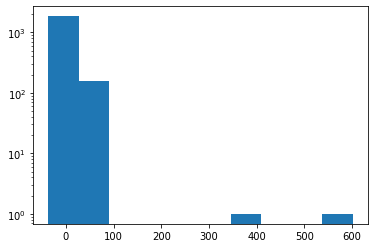

In [16]:
plt.hist(lmbd2)
plt.yscale('log')
print(lmbd2[0],' ',lmbd2[1])

Let's plot the second eigenvector of the adjacency matrix

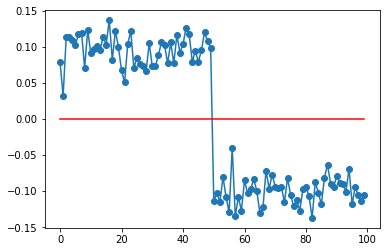

In [17]:
n = g.number_of_nodes()
plt.plot(v[:,1],'-o')
plt.plot(np.repeat(0,n),'r')

In [18]:
n1, n2 = 50, 50 #nodes in the two clusters in our example
second_eigenvector = v[:,1]
cluster1 = np.where(second_eigenvector>0,1,0).flatten()
cluster2 = np.where(second_eigenvector<=0,1,0).flatten()

In [19]:
cluster1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
cluster2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

It is clear that the second eigenvector, once rounded to positive and negative entries gives the two clusters. For fun, let's permute the node ids.  The heatmap/spy plot is no longer giving us the cluster ids by "eyeballing".

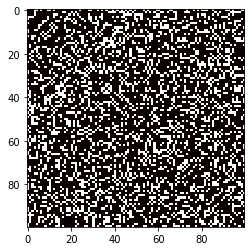

In [21]:
myperm = np.random.permutation(n)
tmp = a[:,myperm]
b = tmp[myperm,:]
plt.imshow(b, cmap='hot', interpolation='nearest')
plt.show()

In [22]:
lmbd,v = np.linalg.eig(b)

In [23]:
n1, n2 = 50, 50 #nodes in the two clusters in our example
second_eigenvector = v[:,1]
cluster1 = np.where(second_eigenvector>0,1,0).flatten()
cluster2 = np.where(second_eigenvector<=0,1,0).flatten()

Let's confirm we got the correct clusters. Indeed this is the case.

In [24]:
ground_truth_cluster1 = range(50)
sorted(myperm[np.nonzero(cluster1)])==np.array(ground_truth_cluster1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

Why does this algorithm work? Why not the top eigenvector. Let's see the basic understanding behind this algorithm known as spectral clustering.  We will answer on whiteboard the following two questions: 

1. What is the expected adjacency matrix $\mathbb{E}[A]$? 
2. What are the eigenvectors, and eigenvalues of $\mathbb{E}[A]$?
3. With tools that you can learn in higher-level classes (e.g., CS591) you can prove that the spectrum of A, and its expectation, under some conditions are close.

# Markov chains and Pagerank 

### Assigned reading: [Chapter 1.1, 1.5.1 Peres-Levin-Wilmer](https://pages.uoregon.edu/dlevin/MARKOV/markovmixing.pdf)

![](frog-levinpereswilmer.png)

Suppose a little frog has two lily pads, one east (e) and one west (w).  The frog jumps randomly from lily pad to lily pad as follows. 

- When it is East, it stays East next day with probability 1-p, otherwise it jumps West with probability p. 
- When it is West, it stays West next day with probability 1-q, otherwise it jumps East with probability q. 

*Question* Say that the frog on Sunday is on the East pad. What is the probability it is on West after 3 days?  


*Answer* Whiteboard. 


In this example we have two states, (e) and (w). In general, we could have any finite number of states.  The **Markov property** states that the value of the random variable $X_{t+1}$ only depends on the value of $X_t$ and not on the values of  $X_{t-1},X_{t-2}\ldots $.

That is:

$$
\text{Pr}(X_{t+1}\mid X_t, X_{t-1},\ldots, X_0) = \text{Pr}(X_{t+1}\mid X_t).
$$

On other words:

$$
\text{Pr}(\text{future}\mid \text{present, past }) = \text{Pr}(\text{future}\mid \text{present}).
$$


A Markov chain involves three definitions:

__Definition.__ Each one of the random variables $X_t$ takes values from a _state space_ $S = \{s_1,
\ldots, s_n\}$.

__Definition.__ A _probability vector_ is a vector of nonnegative entries that sums to 1. 

__Definition.__ A _transition_ matrix is a square matrix of nonnegative values whose rows each sum to 1. Row i, P(i,:) is the probability distribution of transitioning from state i to any other state in our state space. Notice that a transition matrix can be given in its transpose form, namely each column could sum up to 1. 

__Definition.__ A _Markov chain_ is a system whose state is a probability vector over the state space and which evolves according to a transition matrix.  

The connection between the probability vector ${\bf p_t}$ and a stochastic matrix $\mathbf{M} \in \mathbb{R}^{n\times n}$ such that $\mathbf{p}_{t+1}= \mathbf{p}_{t}\mathbf{P}$ for $t=0,1,2,\ldots , T$.



Let's verify our whiteboard analysis, by first writing down the transition matrix $M$ as follows: 

$M = \begin{bmatrix}
P(e,e) &  P(e,w)\\
P(w,e) & P(w,w) 
\end{bmatrix}= \begin{bmatrix}
1-p &  p\\
q & 1-q
\end{bmatrix}
$

In [25]:
p, q = 0.9, 0.5
M = np.matrix([[1-p, p], [q, 1-q]])
mu = np.array([1, 0])

In [26]:
# x(0)=Pr(frog is east|frog starts from east)
# x(1)=Pr(frog is west|frog starts from east)
x = mu*M

In [27]:
print(x)

[[0.1 0.9]]


In [28]:
T = 3
x = mu 
for t in range(T):
    x = x*M
print(x)

[[0.316 0.684]]


What happens if we run the chain for long enough? 

In [29]:
T = 100
x = mu 
for t in range(T):
    x = x*M

print(x)

[[0.35714286 0.64285714]]


Let's do another transition. 

In [30]:
x = x*M
print(x)

[[0.35714286 0.64285714]]


We observe that the mass per state does not change. This is because the chain has reached the *stationary* distribution $\pi$ for which $\pi M = \pi$. Let's verify this:

In [31]:
π = x 
π*M == π

matrix([[ True,  True]])

### Random walks in graphs 


A *random walk* is a special type of a Markov chain that takes place on a (directed or undirected) graph $G=(V,E)$. In this case, the state space of the Markov chain is 
$S = V$ and $\mathbf{P}(i,j)$ is the probability of transition from state $i$ to state $j$ (for any $t$), which in the case of a graph is:

$$
\text{Pr}(X_{t+1}=j \mid X_{t}=i)=\mathbf{M}(i,j) = \frac{w(i\rightarrow j)}{\sum_{j\in V}w(i\rightarrow j)}.
$$

In other words, 
we assume that the object moves from node to node in $G$ , one move per time step $t$.  At time $t$ the object is at node $k$ (say) and at the next time $t+1$  it moves to another node chosen at random from among the outgoing edges of $k$.


How do we create a transition matrix for a random walk for a given graph? Let's start with an undirected graph

[[0 1 1 1]
 [1 0 1 0]
 [1 1 0 0]
 [1 0 0 0]]


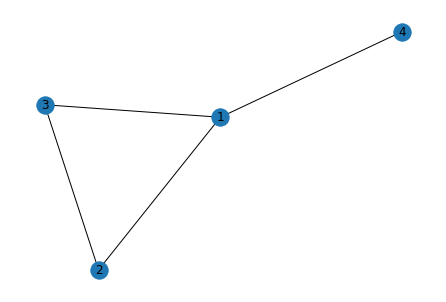

In [32]:
g = nx.empty_graph()
g.add_edge(1,2)
g.add_edge(1,3)
g.add_edge(3,2)
g.add_edge(1,4)
nx.draw(g, with_labels = True)
print(nx.adjacency_matrix(toy_graph).todense())

How can we convert the adjacency matrix to the transition matrix 
$M = \begin{bmatrix}
0 & \frac{1}{3}& \frac{1}{3}& \frac{1}{3}\\
\frac{1}{2} & 0 & \frac{1}{2} & 0 \\ 
\frac{1}{2}  & \frac{1}{2} & 0 & 0\\ 
1 & 0& 0& 0
\end{bmatrix}?
$

In [33]:
A = nx.adjacency_matrix(g)
degree_sequence = [d for _, d in g.degree()]  # degree sequence
D = np.diag(degree_sequence)

In [34]:
print(D)
print(np.linalg.inv(D))

[[3 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 1]]
[[0.33333333 0.         0.         0.        ]
 [0.         0.5        0.         0.        ]
 [0.         0.         0.5        0.        ]
 [0.         0.         0.         1.        ]]


In [35]:
Mg = np.linalg.inv(D)*A
print(Mg)

[[0.         0.33333333 0.33333333 0.33333333]
 [0.5        0.         0.5        0.        ]
 [0.5        0.5        0.         0.        ]
 [1.         0.         0.         0.        ]]


Let's find the stationary distribution of the Markov chain defined by the transition matrix Mg.

In [36]:
S, U = np.linalg.eig(Mg.T)

We know that the top eigenvalue of $M$ will be 1, i.e., there will be an index such that S[i]=1. However due to lack of perfect numerical precision we see

In [37]:
print(S)
S==1

[ 1.          0.22871355 -0.72871355 -0.5       ]


array([False, False, False, False])

Therefore we define a small value to allow for this fact.

In [38]:
ϵ = 0.00000001
πG = np.array(U[:, np.where(np.abs(S - 1.) < ϵ)[0][0]])
πG = πG / np.sum(πG)
print(πG)

[0.375 0.25  0.25  0.125]


In [39]:
degree_sequence/np.sum(degree_sequence)

array([0.375, 0.25 , 0.25 , 0.125])

*Theorem*: For an *undirected* graph $G(V,E)$ the stationary distribution is the  degree distribution, normalized by the total sum of degrees. Namely $\pi_u = \frac{deg(u)}{2m}$ for all nodes $u \in V(G)$. 

Some important remarks:

- If the graph is bipartite, then the random walk will not converge to the stationary distribution. If we start in one class of nodes, after an even number of steps we will be in the same class, and after an odd number of steps, we will be in the other class. The random walk is called periodic.  

-  This theorem does not apply on directed graphs. Furthermore, we can have other issues  such as the following graph where we get stuck to node 3 if we transition there from 1. More generally, we can get "stuck" in a set of nodes, when the graph is not strongly connected. 

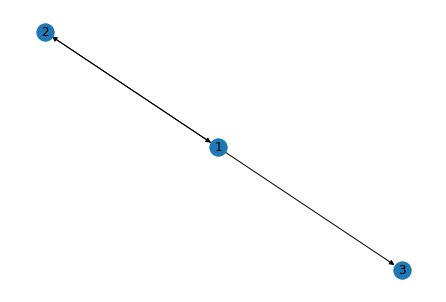

In [40]:
g = nx.DiGraph()
g.add_edge(1,2)
g.add_edge(2,1)
g.add_edge(1,3)
nx.draw(g, with_labels = True)

Let's formalize the two definitions: 

- A chain is irreducible if for any two states $x,y$ there exists an integer $t$ such that $P^t(x,y)>0$. Here $P^t(x,y)$ is the probability that we end up at state $y$, starting from $x$ after $t$ steps. 

- Let $T(x) = \{t: P^t(x,x)>0\}$. The period of $x$ is defined to be the greatest common divisor of $T(x)$. When the chain is irreducible, $T(x)=T(y)$ for all $x,y$. 


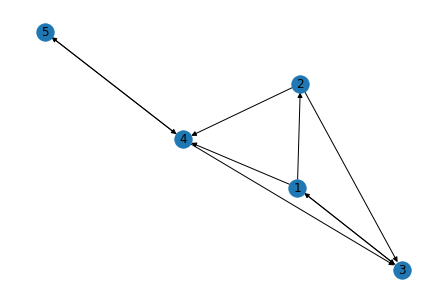

In [41]:

g = nx.DiGraph()
g.add_edge(1,2)
g.add_edge(2,3)
g.add_edge(1,3)
g.add_edge(3,1)
g.add_edge(1,4)
g.add_edge(4,3)
g.add_edge(2,4)
g.add_edge(4,5)
g.add_edge(5,4)
nx.draw(g, with_labels = True)


Let's compute the in-, and out-degrees of $G$.

In [42]:
indeg = [d for _, d in g.in_degree()]  # degree sequence
outdeg = [d for _, d in g.out_degree()]  # degree sequence

print(indeg)
print(outdeg)

[1, 1, 3, 3, 1]
[3, 2, 1, 2, 1]


### Pagerank : ranking importance of Web pages 


How do we rank the importance of web page? A breakthrough approach on which Google initially relied on  was relying on the graph topology, rather than the text content of the web pages. The web graph is defined as follows. 



- For each web page, create a node. 
- From node u, create a link to each node v if u has a hyperlink pointing to v. 


The definition of "importance" is:

$$\mbox{Importance of page $k$} = \sum_j \mbox{(Importance of page $j$)}\cdot\mbox{(Probability of going from page $j$ to page $k$.)}$$


Now we are ready to understand what Page and Brin were saying in 1998:

> PageRank can be thought of as a model of user behavior. We assume there is a “random surfer” who is given a web page at random and keeps clicking on links, never hitting “back” but eventually gets bored and starts on another random page. The probability that the random surfer visits a page is its PageRank.

We assume that the surfer clicks on a link on the current page with probability α; opens up a random page with probability 1-α.

In [43]:
pr = nx.pagerank(g, alpha=0.15)

In [44]:
pr

{1: 0.20153000585937503,
 2: 0.180076529296875,
 3: 0.210200387109375,
 4: 0.22157493984375,
 5: 0.186618137890625}

Let's understand why pagerank gives this ranking of the web pages step by step, but let's first see a very easy case, where we totally discard the underlying graph. 

In [45]:
#surfer jumps around web pages without caring about links, uniform distribution over nodes
pr = nx.pagerank(g, alpha=0) 
print(pr)

{1: 0.2, 2: 0.2, 3: 0.2, 4: 0.2, 5: 0.2}


The teleportation parameter α 

In [46]:
a = nx.adjacency_matrix(g)
print(a.todense())

[[0 1 1 1 0]
 [0 0 1 1 0]
 [1 0 0 0 0]
 [0 0 1 0 1]
 [0 0 0 1 0]]


In [47]:
D = np.diag(outdeg)
W = np.linalg.inv(D)*a
print(W)

[[0.         0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5        0.        ]
 [1.         0.         0.         0.         0.        ]
 [0.         0.         0.5        0.         0.5       ]
 [0.         0.         0.         1.         0.        ]]


In [48]:
n = 5 
alpha = 0.15
teleportation =  1/n*np.ones([n,n])
print(teleportation)

[[0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]]


In [49]:
M = alpha * W+ (1-alpha)*teleportation
print(M)

[[0.17  0.22  0.22  0.22  0.17 ]
 [0.17  0.17  0.245 0.245 0.17 ]
 [0.32  0.17  0.17  0.17  0.17 ]
 [0.17  0.17  0.245 0.17  0.245]
 [0.17  0.17  0.17  0.32  0.17 ]]


In [50]:
 np.matmul(M,np.ones([5,1])) #row stochastic 

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [51]:
S, U = np.linalg.eig(M.T)

In [52]:
S

array([ 1.        +0.j        ,  0.06628706+0.j        ,
       -0.05915064+0.05473932j, -0.05915064-0.05473932j,
       -0.09798579+0.j        ])

In [53]:
U

array([[-0.44934725+0.j        ,  0.48881866+0.j        ,
         0.75168842+0.j        ,  0.75168842-0.j        ,
        -0.63788176+0.j        ],
       [-0.40151272+0.j        ,  0.36871346+0.j        ,
        -0.34227516-0.31674907j, -0.34227516+0.31674907j,
         0.32549706+0.j        ],
       [-0.46867925+0.j        ,  0.21601569+0.j        ,
        -0.29641898+0.27431274j, -0.29641898-0.27431274j,
         0.416689  +0.j        ],
       [-0.49404094+0.j        , -0.50367196+0.j        ,
        -0.1252814 -0.11593821j, -0.1252814 +0.11593821j,
        -0.44463725+0.j        ],
       [-0.41609843+0.j        , -0.56987585+0.j        ,
         0.01228713+0.15837454j,  0.01228713-0.15837454j,
         0.34033295+0.j        ]])

The Perron-Frobenius theorem ensures that the top eigenvalue (1) is real, and that the entries of the corresponding eigenvector are non-negative. 

In [54]:
ϵ = 0.00000001
πG = np.array(U[:, np.where(np.abs(S - 1.) < ϵ)[0][0]])
πG = πG / np.sum(πG)
πG = np.real(πG)
print(πG)

[0.20153005 0.1800765  0.21020036 0.22157496 0.18661812]


In [56]:
pr = nx.pagerank(g, alpha=0.15)
πG - list(pr.values()) <0.001

array([ True,  True,  True,  True,  True])